# EDA - Développement au Togo

Ce notebook présente une Analyse Exploratoire des Données (EDA) pour le dataset `developpement.csv`. L'objectif est de comprendre la distribution des indicateurs socio-économiques et d'identifier des tendances ou des disparités entre les régions, préfectures et communes.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Chargement et Aperçu des Données

In [15]:
# Chargement du dataset
df = pd.read_csv('../../data_raw/developpement.csv')

# Affichage des premières lignes
df.head()

,region,prefecture,commune,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
0,Maritime,Vo,Lomé,860000,0.11,0.24,0.96,0.93,0.67,0.74,0.79,0.76,250,19,48
1,Maritime,Vo,Adakpamé,830000,0.12,0.26,0.94,0.91,0.63,0.71,0.77,0.74,220,16,40
2,Maritime,Golfe,Bè,720000,0.13,0.27,0.92,0.89,0.60,0.69,0.75,0.73,190,13,30
3,Maritime,Golfe,Agoè,700000,0.14,0.29,0.91,0.88,0.58,0.67,0.73,0.71,175,12,26
4,Maritime,Lacs,Aného,560000,0.16,0.31,0.86,0.83,0.46,0.63,0.69,0.66,98,6,16


In [16]:
# Informations sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 33 non-null     object 
 1   prefecture             33 non-null     object 
 2   commune                33 non-null     object 
 3   pib_par_habitant_fcfa  33 non-null     int64  
 4   taux_chomage           33 non-null     float64
 5   taux_pauvrete          33 non-null     float64
 6   acces_electricite      33 non-null     float64
 7   acces_eau_potable      33 non-null     float64
 8   acces_internet         33 non-null     float64
 9   indice_developpement   33 non-null     float64
 10  score_education        33 non-null     float64
 11  score_sante            33 non-null     float64
 12  nombre_ecoles          33 non-null     int64  
 13  nombre_hopitaux        33 non-null     int64  
 14  nombre_banques         33 non-null     int64  
dtypes: float

In [17]:
# Statistiques descriptives
df.describe()

,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,548787.878788,0.204242,0.400909,0.798182,0.770909,0.356667,0.573636,0.627576,0.601212,90.424242,5.272727,14.424242
std,108707.105787,0.046639,0.088895,0.075393,0.074932,0.121106,0.069634,0.071939,0.066884,49.894908,4.185337,9.775704
min,410000.000000,0.110000,0.240000,0.660000,0.630000,0.210000,0.460000,0.510000,0.490000,44.000000,2.000000,5.000000
25%,480000.000000,0.170000,0.340000,0.740000,0.710000,0.260000,0.520000,0.570000,0.550000,60.000000,3.000000,8.000000
50%,520000.000000,0.200000,0.390000,0.790000,0.760000,0.330000,0.560000,0.610000,0.590000,74.000000,4.000000,12.000000
75%,590000.000000,0.240000,0.470000,0.850000,0.820000,0.420000,0.620000,0.670000,0.640000,98.000000,6.000000,16.000000
max,860000.000000,0.300000,0.590000,0.960000,0.930000,0.670000,0.740000,0.790000,0.760000,250.000000,19.000000,48.000000


## 2. Analyse des Valeurs Manquantes

In [18]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nAucune valeur manquante détectée.")

Valeurs manquantes par colonne :
Series([], dtype: int64)

Aucune valeur manquante détectée.


## 3. Analyse Univariée

### Distribution de l'Indice de Développement

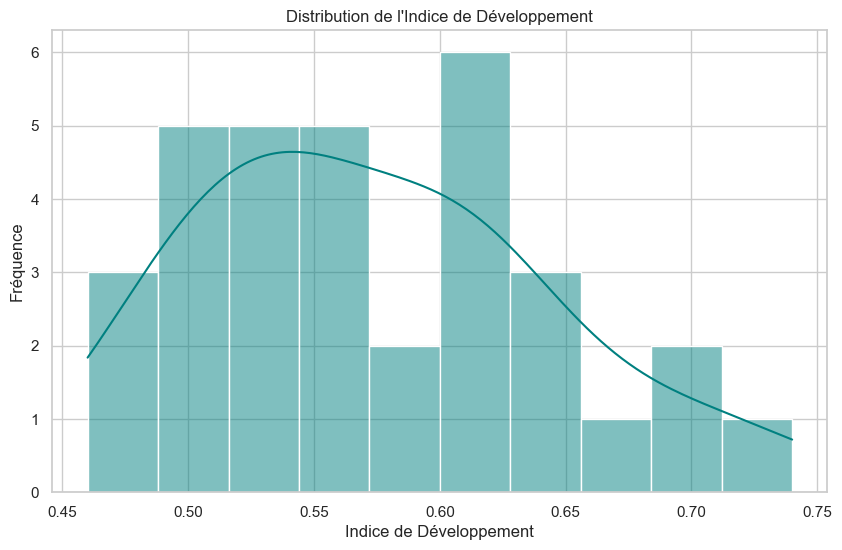

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['indice_developpement'], kde=True, bins=10, color='teal')
plt.title('Distribution de l\'Indice de Développement')
plt.xlabel('Indice de Développement')
plt.ylabel('Fréquence')
plt.show()

### PIB par Habitant (FCFA)

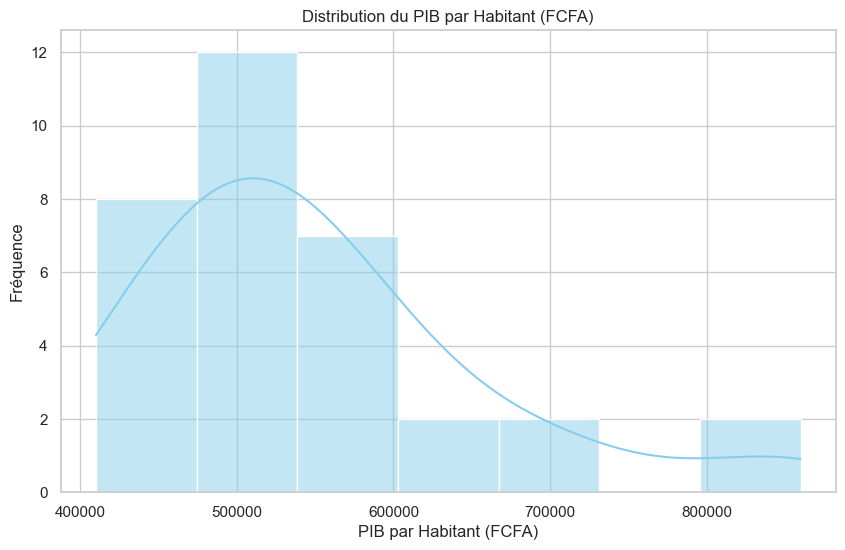

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pib_par_habitant_fcfa'], kde=True, color='skyblue')
plt.title('Distribution du PIB par Habitant (FCFA)')
plt.xlabel('PIB par Habitant (FCFA)')
plt.ylabel('Fréquence')
plt.show()

## 4. Analyse Bivariée

### Indice de Développement par Région

C:\Users\RIG\AppData\Local\Temp\ipykernel_26252\2346057967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='indice_developpement', data=df, palette='viridis')


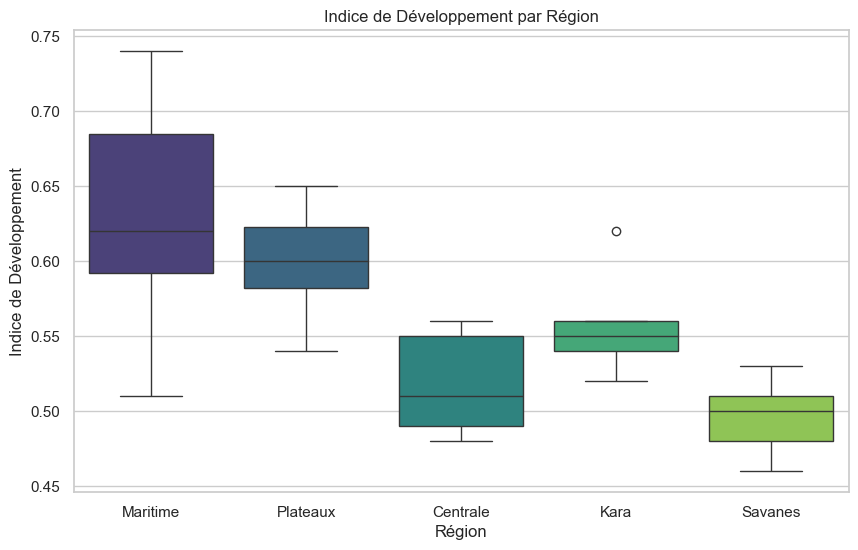

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='indice_developpement', data=df, palette='viridis')
plt.title('Indice de Développement par Région')
plt.xlabel('Région')
plt.ylabel('Indice de Développement')
plt.show()

### Corrélation entre Taux de Pauvreté et Accès à l'Électricité

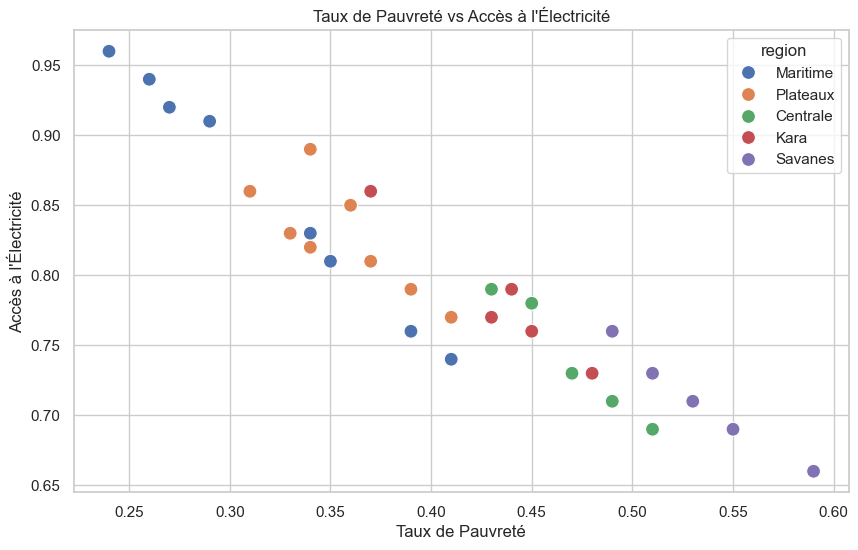

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='taux_pauvrete', y='acces_electricite', hue='region', data=df, s=100)
plt.title('Taux de Pauvreté vs Accès à l\'Électricité')
plt.xlabel('Taux de Pauvreté')
plt.ylabel('Accès à l\'Électricité')
plt.show()

### Matrice de Corrélation

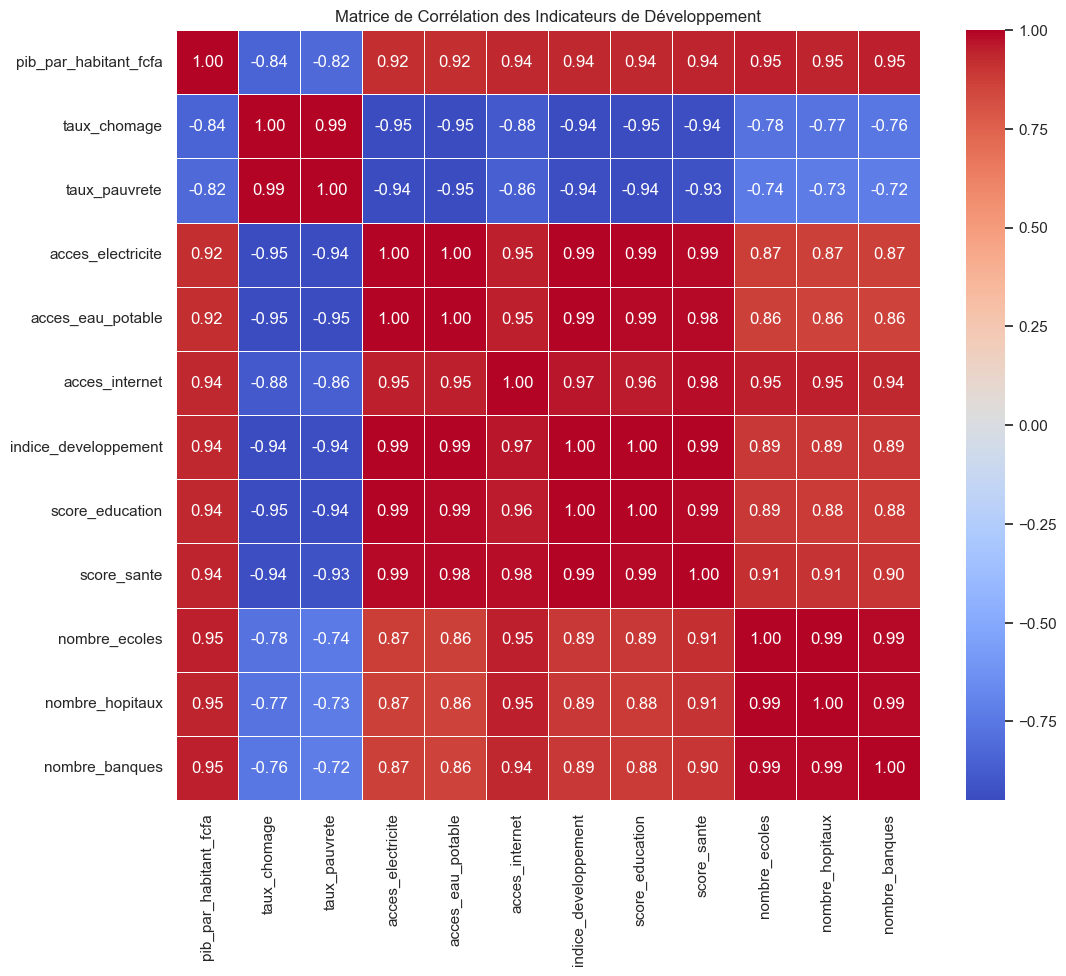

In [23]:
plt.figure(figsize=(12, 10))
# Sélectionner uniquement les colonnes numériques pour la corrélation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Indicateurs de Développement')
plt.show()

## 5. Comparaison des Communes (Top/Flop)

In [24]:
# Top 5 des communes par Indice de Développement
top_5_communes = df.nlargest(5, 'indice_developpement')
print("Top 5 des communes par Indice de Développement :")
display(top_5_communes[['region', 'commune', 'indice_developpement']])

# 5 communes les moins développées
bottom_5_communes = df.nsmallest(5, 'indice_developpement')
print("\n5 communes avec l'Indice de Développement le plus faible :")
display(bottom_5_communes[['region', 'commune', 'indice_developpement']])

Top 5 des communes par Indice de Développement :


,region,commune,indice_developpement
0,Maritime,Lomé,0.74
1,Maritime,Adakpamé,0.71
2,Maritime,Bè,0.69
3,Maritime,Agoè,0.67
10,Plateaux,Atakpamé,0.65



5 communes avec l'Indice de Développement le plus faible :


,region,commune,indice_developpement
32,Savanes,Gando,0.46
19,Centrale,Tchamba,0.48
31,Savanes,Mandouri,0.48
21,Centrale,Bafilo,0.49
30,Savanes,Cinkassé,0.50


In [ ]:
#Verifier la qualité des données
